In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

#Balancing

In [78]:
df = pd.read_csv('df_acidentes_sp_moto.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df['Data do Acidente'] = pd.to_datetime(df['Data do Acidente'],format='%Y-%m-%d')
# df['Ano do Acidente'] = pd.to_datetime(df['Ano do Acidente'],format='%Y')
# df['Dia do Acidente'] = pd.to_datetime(df['Dia do Acidente'],format='%d')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52130 entries, 0 to 52129
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Data do Acidente              52130 non-null  datetime64[ns]
 1   Dia do Acidente               52130 non-null  object        
 2   Mês do Acidente               52130 non-null  object        
 3   Ano do Acidente               52130 non-null  object        
 4   Dia da Semana                 52130 non-null  object        
 5   Hora do Acidente              52130 non-null  object        
 6   Turno                         52130 non-null  object        
 7   Município                     52130 non-null  object        
 8   Conservação                   52130 non-null  object        
 9   LATITUDE                      52130 non-null  float64       
 10  LONGITUDE                     52130 non-null  float64       
 11  Tipo de pista (SIOPM)       

df.columns

In [80]:
proporção_positiva = df['Acidente Fatal'].value_counts()[1]/len(df)
print('Proporção de fatais:', round(proporção_positiva,2))

Proporção de fatais: 0.02


<AxesSubplot:xlabel='Dia da Semana', ylabel='Acidente Fatal'>

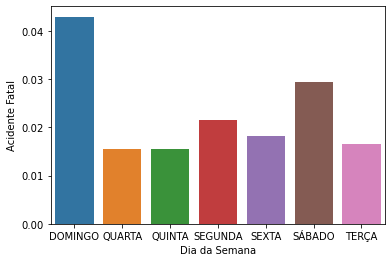

In [81]:
df_g = df.groupby(['Dia da Semana'], as_index=False)['Acidente Fatal'].mean()
sns.barplot(x="Dia da Semana", y="Acidente Fatal", data=df_g)

In [82]:
df_g

,Dia da Semana,Acidente Fatal
0,DOMINGO,0.042917
1,QUARTA,0.015493
2,QUINTA,0.015497
3,SEGUNDA,0.021417
4,SEXTA,0.018099
5,SÁBADO,0.029408
6,TERÇA,0.016494


In [83]:
target = 'Acidente Fatal'

cat_features = ['Dia da Semana','Turno','Tipo de pista (SIOPM)', 'Condições Climáticas', 'Iluminação da via','Superfície da Via','Tipo de Via']

In [84]:
df_processed = pd.get_dummies(df, columns=cat_features, dummy_na=True)


In [85]:
df_processed.columns

Index(['Data do Acidente', 'Dia do Acidente', 'Mês do Acidente',
       'Ano do Acidente', 'Hora do Acidente', 'Município', 'Conservação',
       'LATITUDE', 'LONGITUDE', 'Pessoas Envolvidas - Grave',
       'Pessoas Envolvidas - Ileso', 'Pessoas Envolvidas - Leve',
       'Pessoas Envolvidas - Feridos', 'Pessoas Envolvidas - ND',
       'Acidente Fatal', 'Acidente Não Fatal', 'Dia da Semana_DOMINGO',
       'Dia da Semana_QUARTA', 'Dia da Semana_QUINTA', 'Dia da Semana_SEGUNDA',
       'Dia da Semana_SEXTA', 'Dia da Semana_SÁBADO', 'Dia da Semana_TERÇA',
       'Dia da Semana_nan', 'Turno_MADRUGADA', 'Turno_MANHA',
       'Turno_NAO DISPONIVEL', 'Turno_NOITE', 'Turno_TARDE', 'Turno_nan',
       'Tipo de pista (SIOPM)_DUPLA', 'Tipo de pista (SIOPM)_MULTIPLA',
       'Tipo de pista (SIOPM)_MÚLTIPLA',
       'Tipo de pista (SIOPM)_NAO DISPONIVEL', 'Tipo de pista (SIOPM)_PLANO',
       'Tipo de pista (SIOPM)_SIMPLES', 'Tipo de pista (SIOPM)_nan',
       'Condições Climáticas_BOM', 'Condiç

In [86]:
df_processed.head()

,Data do Acidente,Dia do Acidente,Mês do Acidente,Ano do Acidente,Hora do Acidente,Município,Conservação,LATITUDE,LONGITUDE,Pessoas Envolvidas - Grave,...,Superfície da Via_NAO DISPONIVEL,Superfície da Via_NÃO,Superfície da Via_OLEOSA,Superfície da Via_OUTRAS,Superfície da Via_SECA,Superfície da Via_nan,Tipo de Via_NAO DISPONIVEL,Tipo de Via_Rodovias,Tipo de Via_Vias Municipais,Tipo de Via_nan
0,2020-12-31,1900-01-31,DEZEMBRO,2020-01-01,00:29,SAO PAULO,PREFEITURA,-23.593000,-46.741000,0.0,...,1,0,0,0,0,0,0,0,1,0
1,2020-12-31,1900-01-31,DEZEMBRO,2020-01-01,19:01,SAO PAULO,PREFEITURA,-23.466600,-46.655400,0.0,...,1,0,0,0,0,0,0,0,1,0
2,2020-12-31,1900-01-31,DEZEMBRO,2020-01-01,14:48,SAO PAULO,PREFEITURA,-23.520410,-46.431396,0.0,...,0,0,0,0,1,0,0,0,1,0
3,2020-12-31,1900-01-31,DEZEMBRO,2020-01-01,15:19,SAO PAULO,DR10 - São Paulo,-23.585339,-46.764433,0.0,...,1,0,0,0,0,0,0,1,0,0
4,2020-12-31,1900-01-31,DEZEMBRO,2020-01-01,15:31,SAO PAULO,PREFEITURA,-23.663767,-46.778659,0.0,...,0,0,0,0,1,0,0,0,1,0


In [91]:
#split
X = df_processed.drop(['Data do Acidente', 'Dia do Acidente', 'Mês do Acidente','Ano do Acidente', 'Hora do Acidente', 'Município','Conservação','LATITUDE', 'LONGITUDE', 'Pessoas Envolvidas - Grave','Pessoas Envolvidas - Ileso', 'Pessoas Envolvidas - Leve','Pessoas Envolvidas - Feridos', 'Pessoas Envolvidas - ND','Acidente Fatal', 'Acidente Não Fatal'],axis=1)

y = df_processed['Acidente Fatal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [92]:
#train
classifier = LogisticRegression(max_iter=2000,random_state=42) #definindo o classificador
clf = classifier.fit(X_train,y_train)#treinando o modelo

In [93]:
clf.coef_

array([[ 5.30369928e-01, -3.28912690e-01, -1.35128167e-01,
         4.49583201e-02, -1.25394309e-01,  2.06856611e-01,
        -2.04475630e-01,  0.00000000e+00,  1.49144245e-01,
        -1.08657527e+00,  3.00660704e+00, -9.70249131e-01,
        -1.11065282e+00,  0.00000000e+00, -1.81932754e+00,
         4.02258891e+00, -4.88350524e+00,  4.45648197e+00,
        -1.72420667e-02, -1.77072196e+00,  0.00000000e+00,
        -1.50169497e-01,  1.32330476e-01,  1.15701061e+00,
         1.48051067e-01, -1.28138999e+00, -1.72420667e-02,
        -3.16543151e-04,  0.00000000e+00,  4.15692082e-01,
        -1.72420667e-02, -2.35083209e-02, -1.05544171e+00,
         3.08504643e-01,  6.32553323e-01, -2.58031469e-01,
        -1.42524196e-02,  0.00000000e+00, -1.18742503e-01,
         1.67991675e+00,  5.50287765e-01, -3.59087360e+00,
        -1.72420667e-02,  4.62096822e-02,  4.21143065e-01,
         1.01757497e+00,  0.00000000e+00, -7.20536606e-02,
         6.81451750e-01, -6.21124027e-01,  0.00000000e+0

In [97]:
# Get predicted class, treshold 0.5
y_pred = clf.predict(X_test)

# Get predicted probabilities
y_pred_probs = clf.predict_proba(X_test)
y_pred_probs[:,1]

array([0.00683757, 0.00025584, 0.00550476, ..., 0.00651528, 0.04955767,
       0.05146057])

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


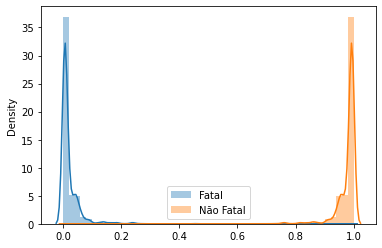

In [102]:
sns.distplot(y_pred_probs[:,1], label='Fatal')
sns.distplot(y_pred_probs[:,0], label='Não Fatal')
plt.legend()
plt.show()

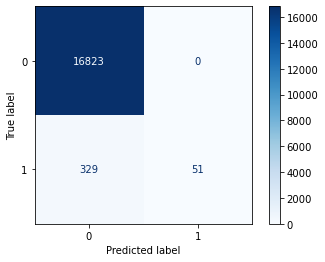

In [105]:
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')
plt.show()
#TP = 51, TN=16823, FP=0, FN=329

In [ ]:
# Acurácia: % de predições corretas do modelo
# Precisão: % de predições corretas dentro da classe positiva do seu modelo
# Recall (sensitivity): % das predições corretas dentro da classe esperada como positiva (do real) (ou do universo positivo, quem eu consegui encontrar)

In [106]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))

Accuracy: 0.9808754287042958
Precision: 1.0
Recall: 0.13421052631578947
F1-Score: 0.23665893271461716


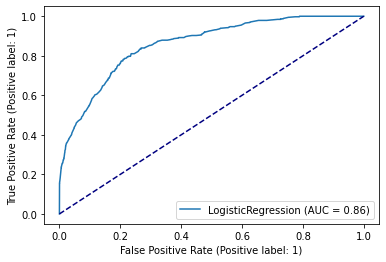

In [107]:
plot_roc_curve(clf, X_test, y_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

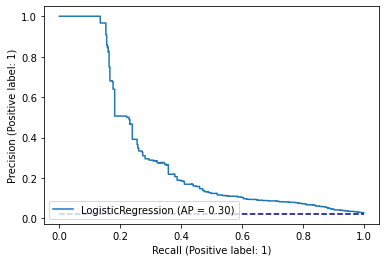

In [109]:
disp = plot_precision_recall_curve(clf, X_test, y_test)
plt.plot([0,1], [proporção_positiva, proporção_positiva], color='navy', linestyle='--')
plt.show()

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


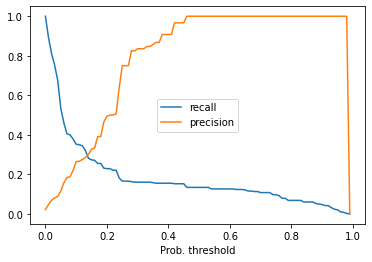

In [110]:
precisions = []
recalls = []
f1s=[]
for i in range(100):
    threshold_prob = i/100
    y_hat = (clf.predict_proba(X_test)[:,1] >= threshold_prob).astype(bool)
    
    precision = precision_score(y_test.values, y_hat)
    recall = recall_score(y_test.values, y_hat)
    f1 = f1_score(y_test.values, y_hat)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
probs = [i/100 for i in range(100)]
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
plt.xlabel('Prob. threshold')
plt.show()

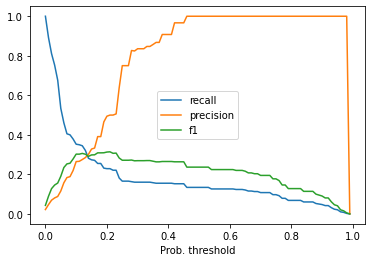

In [111]:
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
sns.lineplot(x=probs, y=f1s, label='f1')
plt.xlabel('Prob. threshold')
plt.show()